In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Fonction de prétraitement
def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()
    
    # Suppression des caractères spéciaux et nombres
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Reconstitution du texte
    return ' '.join(tokens)

In [4]:
# Chargement des données
print("Chargement du dataset 20newsgroups...")
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': newsgroups_data.data})

Chargement du dataset 20newsgroups...


In [5]:
# Prétraitement des textes
print("Prétraitement des textes...")
df['processed_text'] = df['text'].apply(preprocess_text)

Prétraitement des textes...


# Partie I : Implémenter le modèle de topic modeling LDA sur le dataset 20newsgroups afin d'identifier les sujets (topics) présents dans les documents

In [6]:
# Création de la matrice document-termes
vectorizer_lda = CountVectorizer(max_features=1000, stop_words='english')
X_lda = vectorizer_lda.fit_transform(df['processed_text'])

In [7]:
# Application de LDA
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda.fit_transform(X_lda)

In [8]:
# Affichage des topics LDA
feature_names = vectorizer_lda.get_feature_names_out()
print("\nTopics LDA :")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Topics LDA :
Topic #1: article, address, research, email, program, new, list, information, year, space
Topic #2: floppy, bus, bit, controller, hard, mb, scsi, disk, drive, maxaxaxaxaxaxaxaxaxaxaxaxaxaxax
Topic #3: war, jew, country, israel, gun, people, right, law, state, government
Topic #4: price, use, work, card, new, thanks, im, know, like, car
Topic #5: win, season, president, mr, st, play, player, year, team, game
Topic #6: version, use, format, information, software, file, data, available, key, image
Topic #7: faith, people, say, christ, word, bible, church, jesus, christian, god
Topic #8: say, went, woman, year, day, time, child, people, said, armenian
Topic #9: run, server, version, application, using, problem, use, program, file, window
Topic #10: good, im, make, say, thing, know, like, people, think, dont


In [9]:
# Assignation des topics dominants
df['lda_dominant_topic'] = lda_output.argmax(axis=1)

# Partie II : Implémenter la méthode LSA sur le dataset 20newsgroups afin d'extraire les thèmes (topics) présents dans les documents. 

In [10]:
# Création de la matrice TF-IDF
vectorizer_lsa = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer_lsa.fit_transform(df['processed_text'])

In [11]:
# Application de LSA
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_output = lsa.fit_transform(X_tfidf)

In [12]:
# Affichage des topics LSA
feature_names = vectorizer_lsa.get_feature_names_out()
print("\nThèmes LSA :")
for topic_idx, topic in enumerate(lsa.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    print(f"Thème #{topic_idx + 1}: {', '.join(top_words)}")


Thèmes LSA :
Thème #1: problem, use, good, time, im, think, people, like, know, dont
Thème #2: disk, use, driver, email, program, card, drive, thanks, file, window
Thème #3: baseball, fan, win, play, hockey, season, player, year, team, game
Thème #4: bike, card, price, hard, new, disk, mb, scsi, car, drive
Thème #5: mb, disk, thanks, scsi, christian, jesus, card, game, drive, god
Thème #6: info, interested, like, hi, advance, looking, im, email, know, thanks
Thème #7: engine, think, ive, dont, like, bike, problem, im, window, car
Thème #8: condition, offer, book, window, price, sale, year, god, new, car
Thème #9: book, hard, thanks, email, program, year, format, disk, drive, file
Thème #10: encryption, bit, used, phone, file, good, use, chip, god, key


## Analyse qualitative

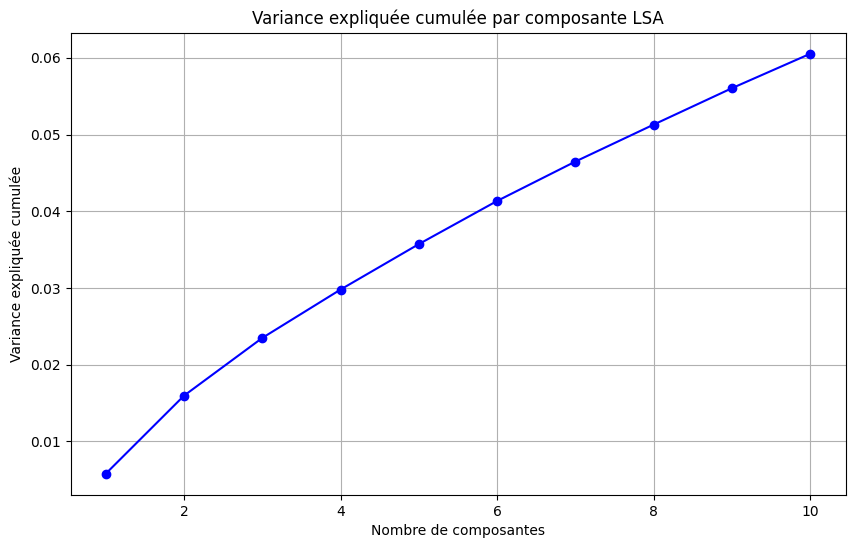

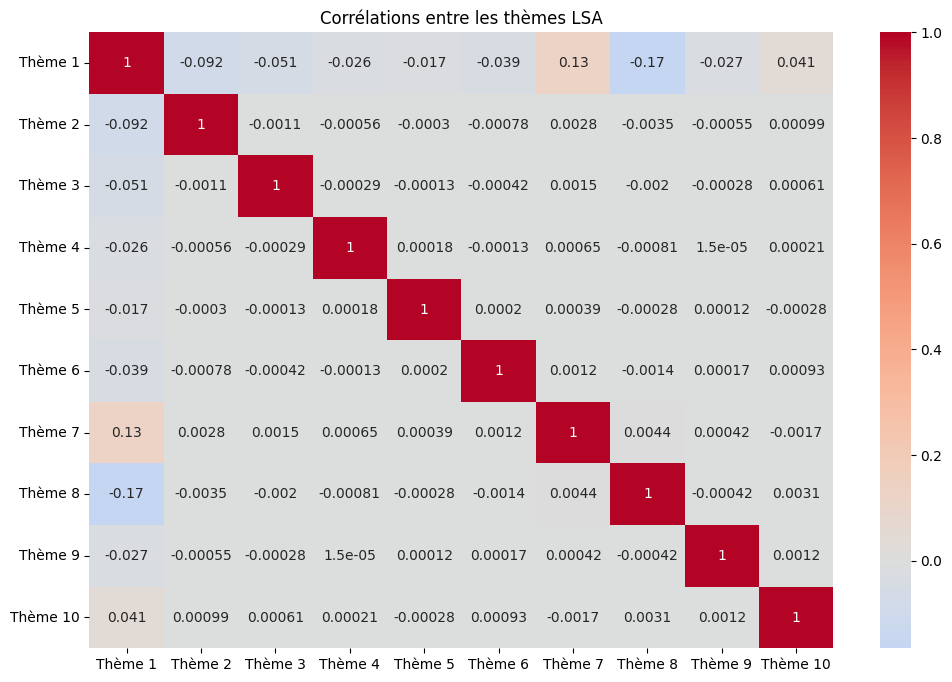

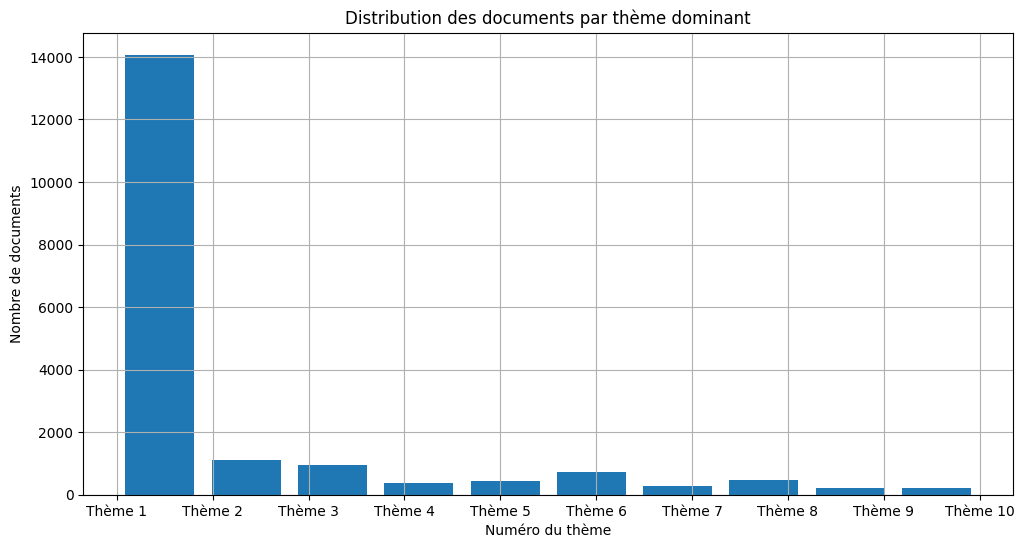

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculer la variance expliquée par chaque composante
explained_variance_ratio = lsa.explained_variance_ratio_

# Visualisation de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par composante LSA')
plt.grid(True)
plt.show()

# Créer un heatmap des corrélations entre thèmes
theme_correlations = np.corrcoef(lsa_output.T)
plt.figure(figsize=(12, 8))
sns.heatmap(theme_correlations, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            xticklabels=[f'Thème {i+1}' for i in range(10)],
            yticklabels=[f'Thème {i+1}' for i in range(10)])
plt.title('Corrélations entre les thèmes LSA')
plt.show()

# Visualiser la distribution des documents par thème dominant
dominant_themes = lsa_output.argmax(axis=1)
plt.figure(figsize=(12, 6))
plt.hist(dominant_themes, bins=10, rwidth=0.8)
plt.title('Distribution des documents par thème dominant')
plt.xlabel('Numéro du thème')
plt.ylabel('Nombre de documents')
plt.xticks(range(10), [f'Thème {i+1}' for i in range(10)])
plt.grid(True)
plt.show()

In [13]:
# Assignation des topics dominants
df['lsa_dominant_topic'] = lsa_output.argmax(axis=1)

# Partie III : Implémenter la méthode BERTopic sur le dataset 20newsgroups afin d'extraire les thèmes (topics) présents dans les documents. 

In [16]:
# Création et application du modèle BERTopic
topic_model = BERTopic(language="english", nr_topics=num_topics)
topics, probs = topic_model.fit_transform(df['text'])

In [17]:
# Affichage des résultats BERTopic
print("\nTopics BERTopic les plus fréquents :")
print(topic_model.get_topic_info().head(10))


Topics BERTopic les plus fréquents :
   Topic  Count                                         Name  \
0     -1   6425                             -1_the_to_of_and   
1      0   4859                              0_the_to_and_of   
2      1   3894                              1_the_of_to_and   
3      2   1822                              2_the_to_in_and   
4      3    604                              3_the_of_to_and   
5      4    461                              4_the_of_to_and   
6      5    397                             5_the_to_and_you   
7      6    182                               6_the_to_is_of   
8      7    114  7_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_the_of_is   
9      8     88                    8_insurance_the_health_in   

                                      Representation  \
0     [the, to, of, and, is, in, that, it, for, you]   
1    [the, to, and, of, is, for, in, it, that, this]   
2     [the, of, to, and, that, in, is, it, you, not]   
3    [the, to, in, and, he, of, g

## Visualisation des résultats

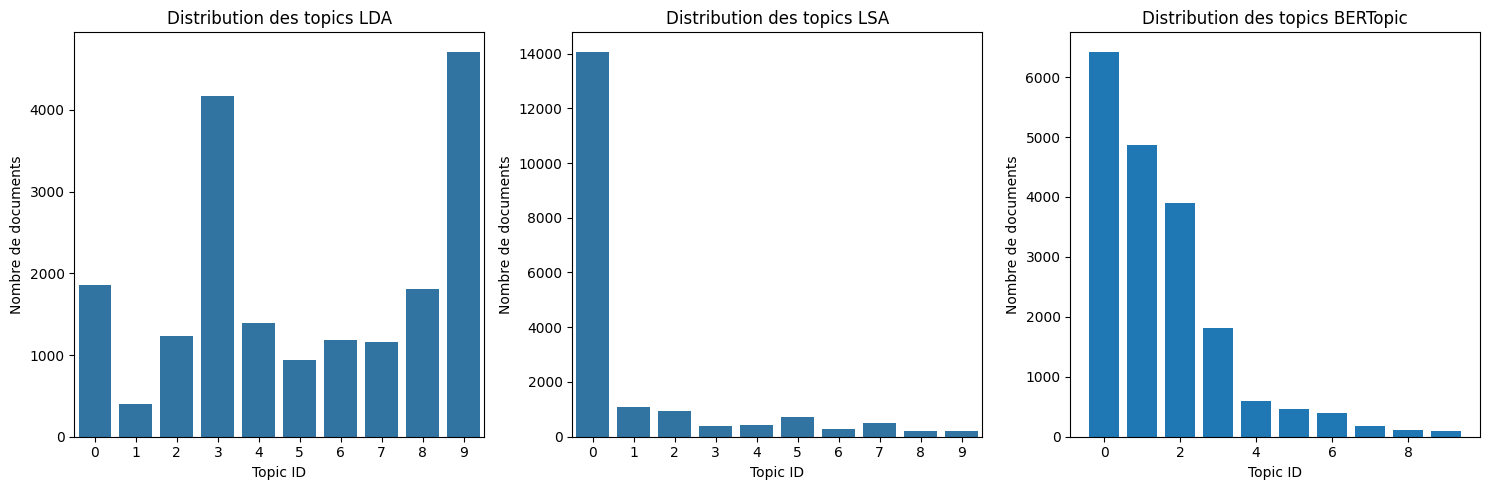

In [18]:
plt.figure(figsize=(15, 5))

# LDA
plt.subplot(131)
sns.countplot(data=df, x='lda_dominant_topic')
plt.title('Distribution des topics LDA')
plt.xlabel('Topic ID')
plt.ylabel('Nombre de documents')

# LSA
plt.subplot(132)
sns.countplot(data=df, x='lsa_dominant_topic')
plt.title('Distribution des topics LSA')
plt.xlabel('Topic ID')
plt.ylabel('Nombre de documents')

# BERTopic
plt.subplot(133)
topic_freq = topic_model.get_topic_freq()
plt.bar(range(min(10, len(topic_freq))), topic_freq['Count'][:10])
plt.title('Distribution des topics BERTopic')
plt.xlabel('Topic ID')
plt.ylabel('Nombre de documents')

plt.tight_layout()
plt.show()

In [23]:
# Sauvegarde des résultats
print("\nSauvegarde des résultats...")
results = pd.DataFrame({
    'text': df['text'],
    'lda_topic': df['lda_dominant_topic'],
    'lsa_topic': df['lsa_dominant_topic'],
    'bertopic': topics
})
results.to_csv(r'C:\Users\Admin\Desktop\School\S5\Text Mining\topic_modeling_results.csv', index=False)

print("\nAnalyse terminée ! Les résultats ont été sauvegardés dans 'topic_modeling_results.csv'")


Sauvegarde des résultats...

Analyse terminée ! Les résultats ont été sauvegardés dans 'topic_modeling_results.csv'
